**Problem statement:-**
The data scientists at BigMart have collected comprehensive sales data for 1559 products across 10 stores in different cities. They have also gathered attributes related to each product and store. The objective of this data science project is to develop a predictive model that accurately estimates the sales of each product at a specific store. By achieving this goal, BigMart aims to gain insights into the key properties of products and stores that have a significant impact on sales performance.


**Hypothesis generation:-**
The hypothesis is that specific attributes of products, such as brand, weight, packaging, and category, significantly influence the sales of the product at a particular store. By analyzing these attributes, BigMart can identify the key factors that contribute to higher sales and optimize their product selection and inventory management accordingly.


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [ ]:
#test data
data=pd.read_csv('/content/Test.csv')
print (data)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDW58       20.750          Low Fat         0.007565   
1              FDW14        8.300              reg         0.038428   
2              NCN55       14.600          Low Fat         0.099575   
3              FDQ58        7.315          Low Fat         0.015388   
4              FDY38          NaN          Regular         0.118599   
...              ...          ...              ...              ...   
5676           FDB58       10.500          Regular         0.013496   
5677           FDD47        7.600          Regular         0.142991   
5678           NCO17       10.000          Low Fat         0.073529   
5679           FDJ26       15.300          Regular         0.000000   
5680           FDU37        9.500          Regular         0.104720   

               Item_Type  Item_MRP Outlet_Identifier  \
0            Snack Foods  107.8622            OUT049   
1                  Dairy   87.3198 

In [ ]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [ ]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
data.value_counts()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type     Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  Outlet_Type      
DRA12            11.600       LF                0.041010         Soft Drinks   141.0154  OUT049             1999                       Medium       Tier 1                Supermarket Type1    1
FDV10            7.645        Regular           0.066978         Snack Foods   43.0112   OUT018             2009                       Medium       Tier 3                Supermarket Type2    1
FDV27            7.970        Regular           0.039982         Meat          87.6514   OUT035             2004                       Small        Tier 2                Supermarket Type1    1
                                                0.039990         Meat          86.8514   OUT046             1997                       Small        Tier 1                Supermarket Type1    1
FDV28            16.100       Regular   

In [ ]:
data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
5676,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1
5680,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1


In [ ]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [ ]:
data.shape

(5681, 11)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [ ]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [ ]:
#Mean and mode - missed value
data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace=True)
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0],inplace=True)

In [ ]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [ ]:
#check the duplicate data
duplicate=data.duplicated()
print(duplicate.sum())

0


In [ ]:
#train data
data1=pd.read_csv('/content/Train.csv')
print (data1)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks  

In [ ]:
data1.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
data1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
data1.value_counts()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type     Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  Outlet_Type        Item_Outlet_Sales
DRA12            11.600       LF                0.000000         Soft Drinks   141.9154  OUT035             2004                       Small        Tier 2                Supermarket Type1  992.7078             1
FDV35            19.500       Low Fat           0.128182         Breads        156.1314  OUT035             2004                       Small        Tier 2                Supermarket Type1  2792.3652            1
FDV25            5.905        low fat           0.045614         Canned        221.5456  OUT013             1987                       High         Tier 3                Supermarket Type1  6852.4136            1
                              Low Fat           0.045838         Canned        222.5456  OUT018             2009                       Medium       Tier 3   

In [ ]:
data1.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [ ]:
data1.shape

(8523, 12)

In [ ]:
data1.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
data1.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
#Mean and mode - missed value
data1['Item_Weight'].fillna(data1['Item_Weight'].mean(),inplace=True)
data1['Outlet_Size'].fillna(data1['Outlet_Size'].mode()[0],inplace=True)
data1.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
data1.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


array([[<Axes: title={'center': 'Item_Weight'}>,
        <Axes: title={'center': 'Item_Visibility'}>],
       [<Axes: title={'center': 'Item_MRP'}>,
        <Axes: title={'center': 'Outlet_Establishment_Year'}>]],
      dtype=object)

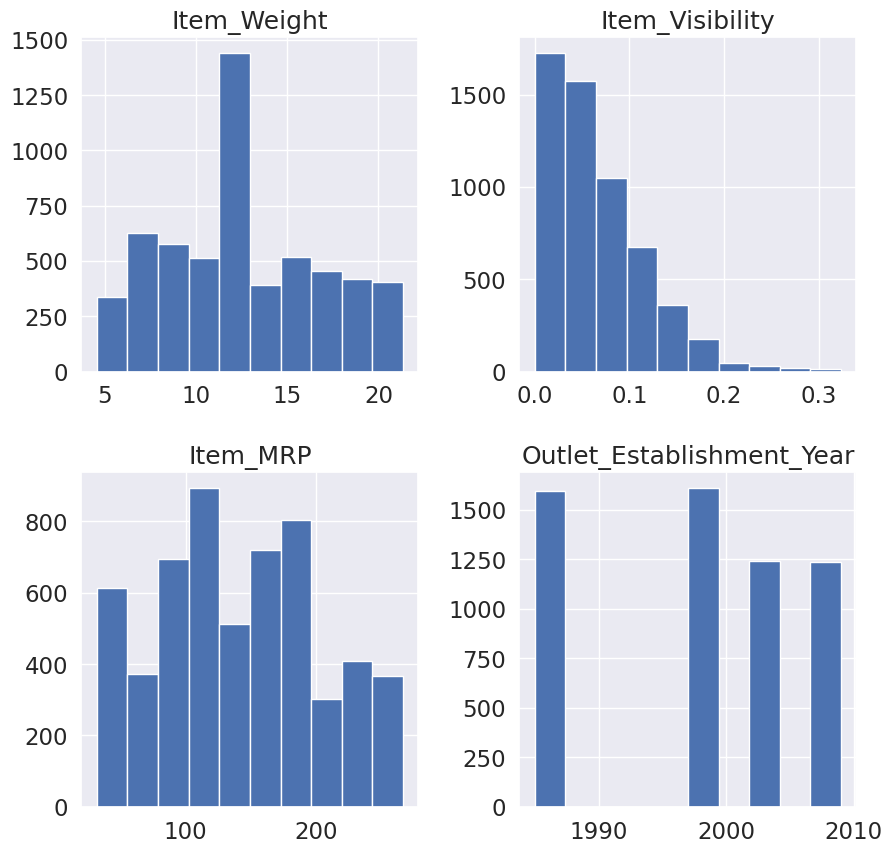

In [ ]:
#univariate data visualization for test data
data.hist(figsize = (10,10),grid=True)

array([[<Axes: title={'center': 'Item_Weight'}>,
        <Axes: title={'center': 'Item_Visibility'}>],
       [<Axes: title={'center': 'Item_MRP'}>,
        <Axes: title={'center': 'Outlet_Establishment_Year'}>],
       [<Axes: title={'center': 'Item_Outlet_Sales'}>, <Axes: >]],
      dtype=object)

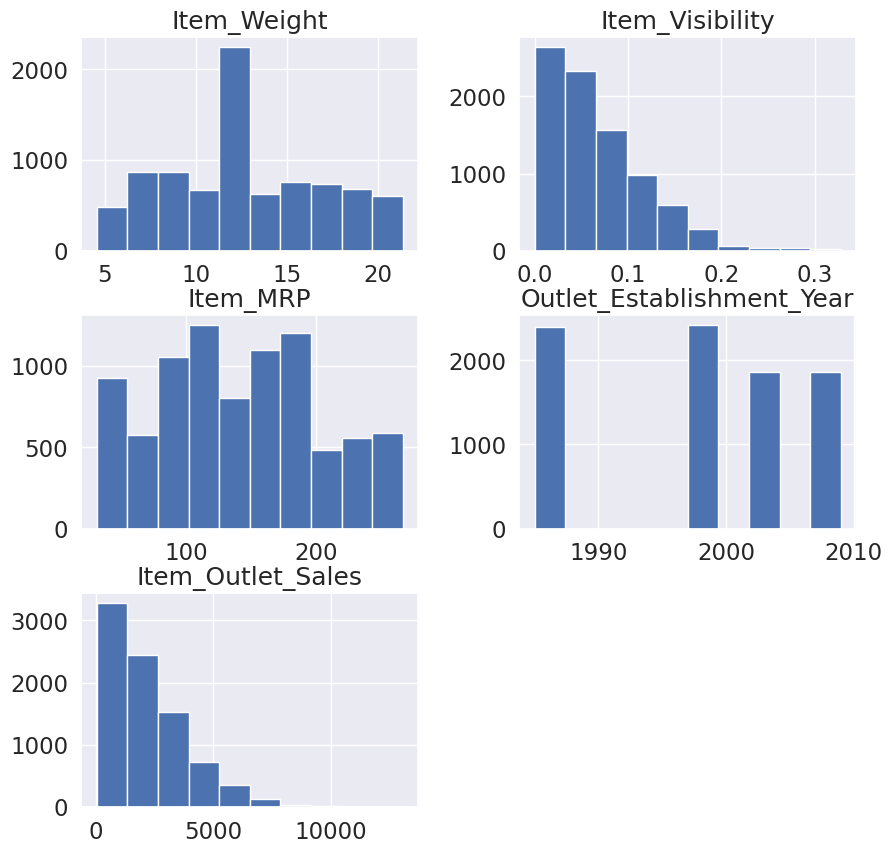

In [ ]:
#univariate data visualization for train data
data1.hist(figsize = (10,10),grid=True)

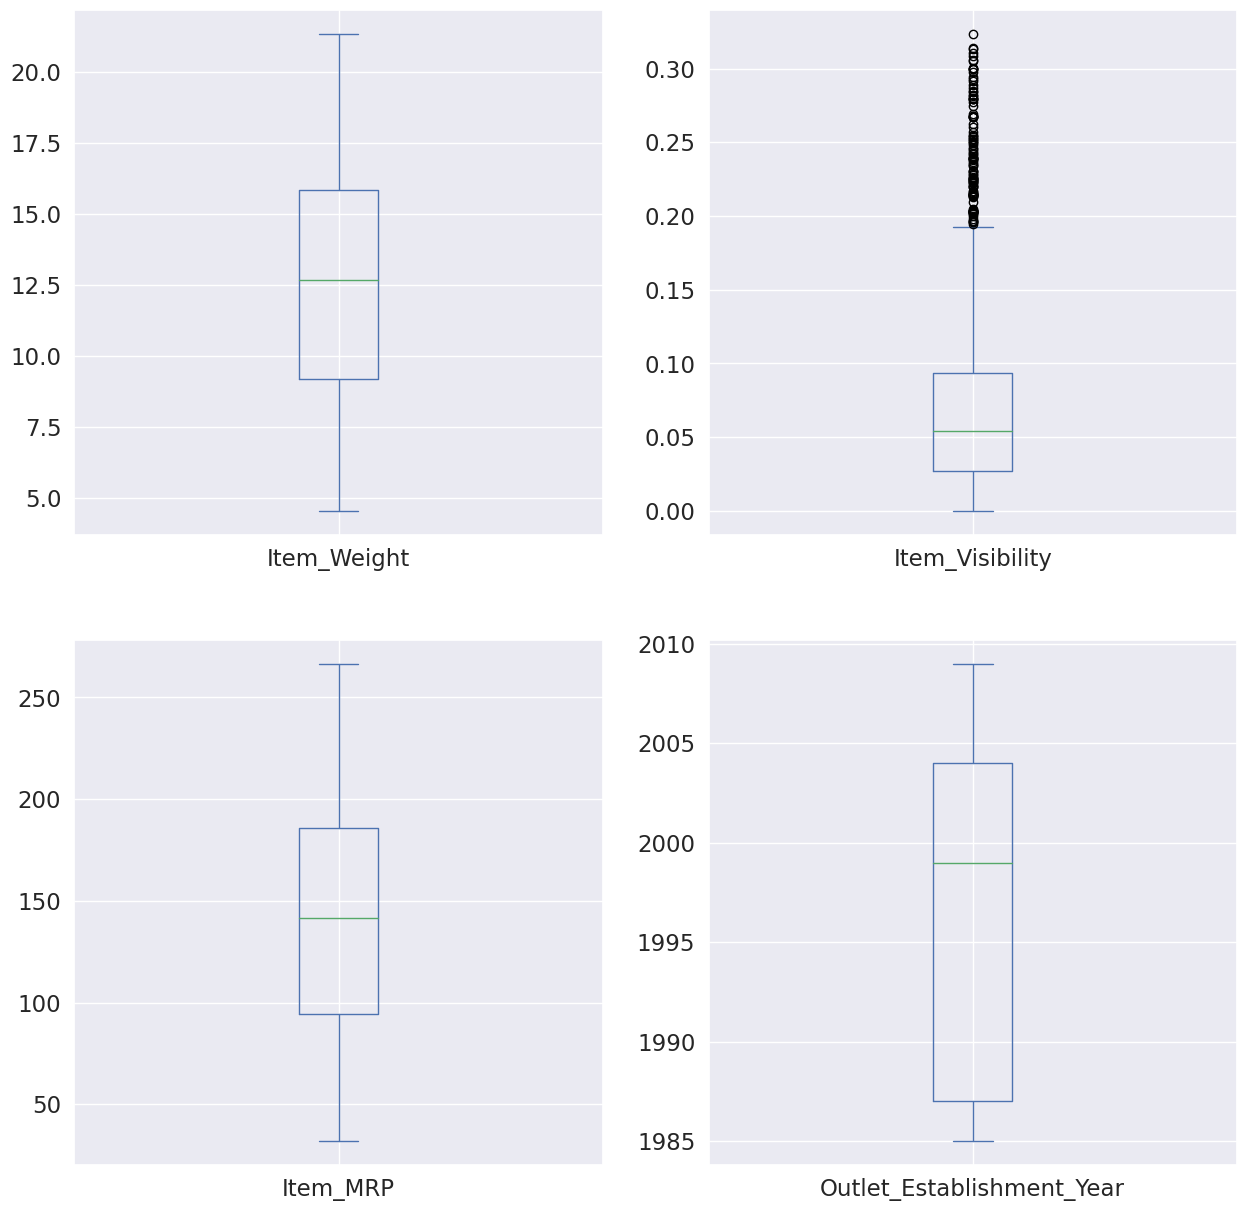

In [ ]:
#univariate data visualization for test data
data.plot(kind= 'box' , subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(15,15))
sns.set(font_scale = 1.5)

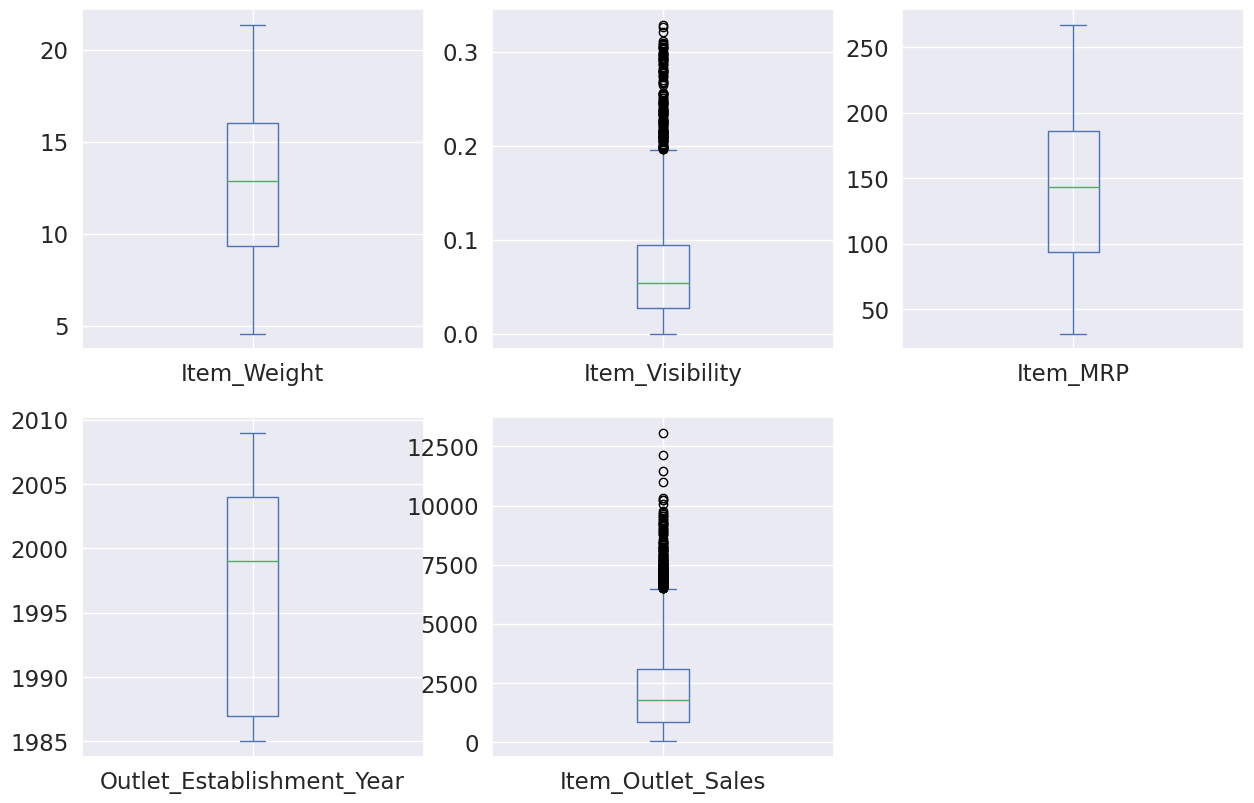

In [ ]:
#univariate data visualization for train data
data1.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(15,15))
sns.set(font_scale = 1.5)

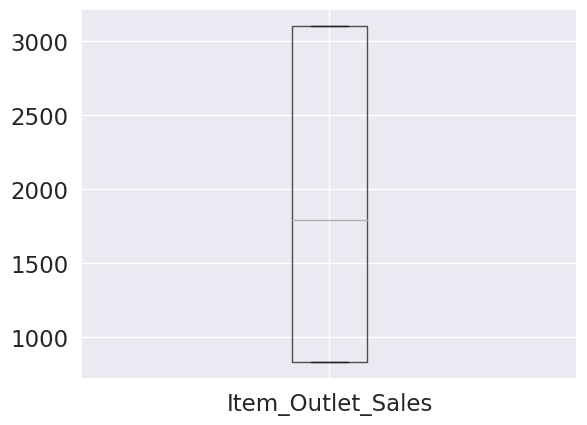

In [ ]:
#removing outliers from train data
def remove_outlier(col):
    sorted(col)
    q1,q3=col.quantile([0.25,0.75])
    lower_range=q1-(1.5 * 0.25)
    upper_range=q3-(1.5 *0.75)
    return lower_range,upper_range
lowsales,uppsales=remove_outlier(data1['Item_Outlet_Sales'])
data1['Item_Outlet_Sales']=np.where(data1['Item_Outlet_Sales']>uppsales,uppsales,data1['Item_Outlet_Sales'])
data1['Item_Outlet_Sales']=np.where(data1['Item_Outlet_Sales']<lowsales,lowsales,data1['Item_Outlet_Sales'])
data1.boxplot(column=['Item_Outlet_Sales'])
plt.show()


<ipython-input-115-2886c2cce301>:3: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  covv=data1.cov()
<ipython-input-115-2886c2cce301>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data1.corr()
<ipython-input-115-2886c2cce301>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data1.corr(),annot=True)



                            Item_Weight  Item_Visibility      Item_MRP  \
Item_Weight                  17.860122        -0.002627      6.515364   
Item_Visibility              -0.002627         0.002662     -0.004225   
Item_MRP                      6.515364        -0.004225   3878.183909   
Outlet_Establishment_Year    -0.293684        -0.032325      2.617143   
Item_Outlet_Sales            64.949384        -6.493954  32156.223367   

                           Outlet_Establishment_Year  Item_Outlet_Sales  
Item_Weight                                -0.293684          64.949384  
Item_Visibility                            -0.032325          -6.493954  
Item_MRP                                    2.617143       32156.223367  
Outlet_Establishment_Year                  70.086372         -27.820732  
Item_Outlet_Sales                         -27.820732      850615.204255  

                            Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                   1.000000      

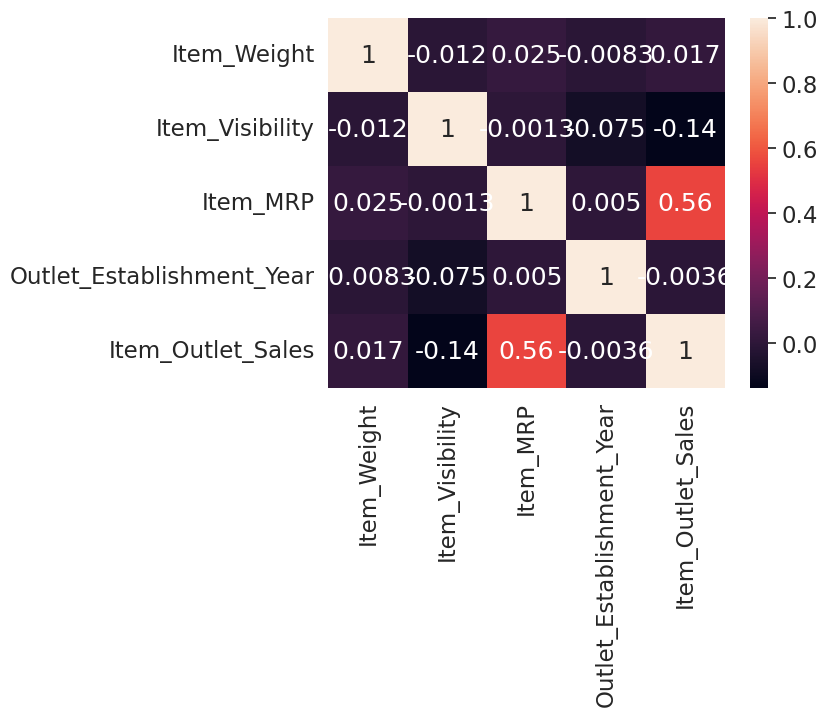

In [ ]:
#bivariate data visualization analysis
# Create a heatmap
covv=data1.cov()
print("\n",covv)

corr=data1.corr()
print("\n",corr)

sns.heatmap(data1.corr(),annot=True)
plt.show()


<ipython-input-116-a94e0d15e45c>:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  covv=data.cov()
<ipython-input-116-a94e0d15e45c>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr()
<ipython-input-116-a94e0d15e45c>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)



                            Item_Weight  Item_Visibility     Item_MRP  \
Item_Weight                  18.021631        -0.003564    11.875026   
Item_Visibility              -0.003564         0.002627    -0.044391   
Item_MRP                     11.875026        -0.044391  3820.363680   
Outlet_Establishment_Year     0.481518        -0.041640    -3.742832   

                           Outlet_Establishment_Year  
Item_Weight                                 0.481518  
Item_Visibility                            -0.041640  
Item_MRP                                   -3.742832  
Outlet_Establishment_Year                  70.094664  

                            Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                   1.000000        -0.016380  0.045257   
Item_Visibility              -0.016380         1.000000 -0.014013   
Item_MRP                      0.045257        -0.014013  1.000000   
Outlet_Establishment_Year     0.013548        -0.097040 -0.007233   

              

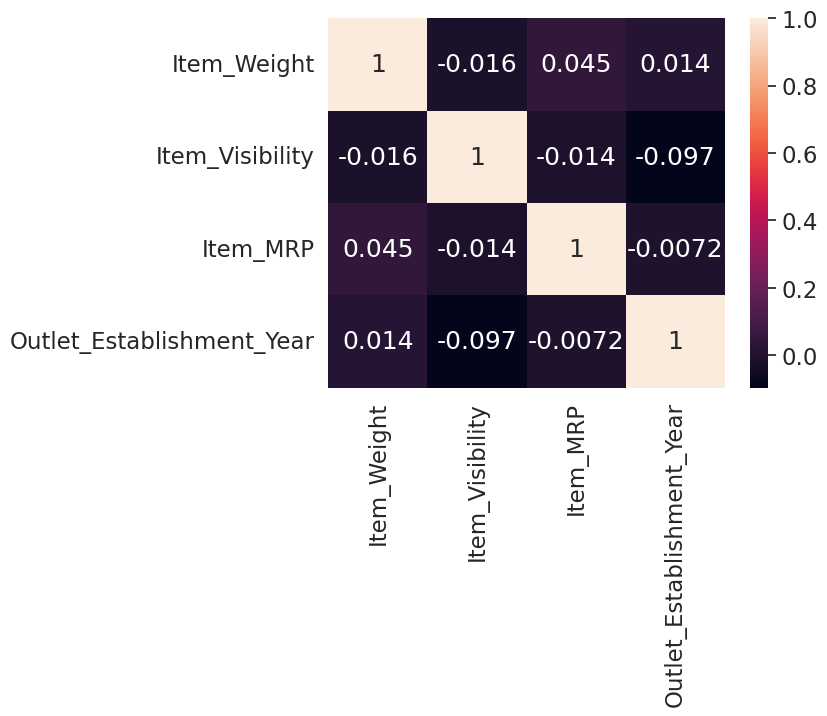

In [ ]:
covv=data.cov()
print("\n",covv)

corr=data.corr()
print("\n",corr)

sns.heatmap(data.corr(),annot=True)
plt.show()

In [ ]:
data1['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
data1['Item_Fat_Content']= data1['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
data1['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
#Encoding Categorical Variables and One Hot Encoding
from sklearn import preprocessing
print(data1.head())
O_TYPE = pd.get_dummies(data1['Outlet_Type'])
O_LOCATION_T = pd.get_dummies(data1['Outlet_Location_Type'])
O_SIZE = pd.get_dummies(data1['Outlet_Size'])
I_FAT = pd.get_dummies(data1['Item_Fat_Content'])

NW_data1 = pd.concat([data1,O_TYPE,O_LOCATION_T,O_SIZE,I_FAT],axis=1)
print(NW_data1)

label = NW_data1['Item_Outlet_Sales']

train = NW_data1.drop(columns=['Item_Identifier','Item_Weight','Outlet_Type','Outlet_Identifier','Item_Fat_Content','Item_Outlet_Sales','Outlet_Location_Type','Item_Type','Outlet_Size','Outlet_Establishment_Year'])
print(train)
data_types_dict = {'Item_Identifier': int,'Item_Fat_Content': int,'Item_Type': int,'Outlet_Identifier': int
    ,'Outlet_Size': int,'Outlet_Location_Type': int,'Outlet_Type': int}

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier

In [ ]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

data1['Item_Identifier'] = encoder.fit_transform(data1['Item_Identifier'])
data1['Item_Fat_Content'] = encoder.fit_transform(data1['Item_Fat_Content'])
data1['Item_Type'] = encoder.fit_transform(data1['Item_Type'])
data1['Outlet_Identifier'] = encoder.fit_transform(data1['Outlet_Identifier'])
data1['Outlet_Size'] = encoder.fit_transform(data1['Outlet_Size'])
data1['Outlet_Location_Type'] = encoder.fit_transform(data1['Outlet_Location_Type'])
data1['Outlet_Type'] = encoder.fit_transform(data1['Outlet_Type'])

X = data1.drop(columns='Item_Outlet_Sales', axis=1)
Y = data1['Item_Outlet_Sales']
print(X)
print(Y)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


In [ ]:
#Machine Learning Model Training:

#Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

In [ ]:
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [ ]:
training_data_prediction = regressor.predict(X_train)

In [ ]:
r2_train = r2_score(Y_train, training_data_prediction)

In [ ]:
print('R Squared value = ', r2_train)

R Squared value =  0.48751945576740263


In [ ]:
test_data_prediction = regressor.predict(X_test)

In [ ]:
r2_test = r2_score(Y_test, test_data_prediction)

In [ ]:
print('R·Squared·value·=',r2_test)

R·Squared·value·= 0.4710747785274133


In [ ]:
#Regularized Linear Regression

#LASSO

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Create and train the Lasso regression model
regressor = Lasso(alpha=0.1)
regressor.fit(X_train, Y_train)

Lasso(alpha=0.1)

In [ ]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [ ]:
print('R Squared value = ', r2_train)

R Squared value =  0.48751945576740263


In [ ]:
test_data_prediction = regressor.predict(X_test)

In [ ]:
r2_test = r2_score(Y_test, test_data_prediction)

In [ ]:
print('R Squared value = ', r2_test)

R Squared value =  0.47100510179582644


In [ ]:
#RIDGE
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Create and train the Lasso regression model
regressor = Ridge(alpha=0.1)
regressor.fit(X_train, Y_train)


Ridge(alpha=0.1)

In [ ]:
training_data_prediction = regressor.predict(X_train)

In [ ]:
r2_train = r2_score(Y_train, training_data_prediction)

In [ ]:
print('R Squared value = ', r2_train)

R Squared value =  0.4875193876352599


In [ ]:
test_data_prediction = regressor.predict(X_test)

In [ ]:
r2_test = r2_score(Y_test, test_data_prediction)

In [ ]:
print('R Squared value = ', r2_test)

R Squared value =  0.4710695526998201


In [ ]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, Y_train)

RandomForestRegressor(random_state=0)

In [ ]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [ ]:
r2_train =r2_score(Y_train, training_data_prediction)

In [ ]:
print('R Squared value = ', r2_train)

R Squared value =  0.9395945703848642


In [ ]:
test_data_prediction = regressor.predict(X_test)

In [ ]:
r2_test = r2_score(Y_test, test_data_prediction)

In [ ]:
print('R·Squared·value·=',r2_test)

R·Squared·value·= 0.5509241152710131


In [ ]:
from xgboost import XGBRegressor
regressor = XGBRegressor()

In [ ]:
regressor.fit(X_train,Y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
training_data_prediction = regressor.predict(X_train)

In [ ]:
r2_train = r2_score(Y_train, training_data_prediction)

In [ ]:
print('R Squared value = ', r2_train)

R Squared value =  0.8526890932679335


In [ ]:
test_data_prediction = regressor.predict(X_test)

In [ ]:
r2_test = r2_score(Y_test, test_data_prediction)

In [ ]:
print('R·Squared·value·=',r2_test)

R·Squared·value·= 0.5391088929056895


**CONCLUSION**:-

Based on the analysis and evaluation of the regularized linear regression model and the random forest model, it can be concluded that the random forest model is the better choice for prediction. Here are the key points supporting this conclusion:

1.Prediction Accuracy
2.Model Flexibility
3.Handling Non-linear Relationships

Considering these factors, the random forest model emerges as the preferred choice for prediction tasks. 